In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
from code_repository.load.load_simulations import LoadSimulations

In [2]:
external = os.path.join("/media","jofrony", "2TB", "dardel","current_bgd2","population_unit", 
                        "distance_complete", "supercomputer", "networks")
repository = os.path.join("/home","jofrony","Documents",
                          "Repositories","current_bgd2",
                          "population_unit", 
                        "distance_complete", "supercomputer", "networks")

In [3]:
name = "synaptic_drive_DA"
folder = "ratio"

In [4]:
e = Experiments()
e.add_experiment(name="p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1.hdf5")


e.add_experiment(name="p1_DA",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_dopamine_modulation_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5")



e.add_experiment(name="p1_p2",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_p2.hdf5")


e.add_experiment(name="p1_p2_DA",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_p2_dopamine_modulation_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5")

   
e.experiments     

{'p1': {'color': 'black',
  'label': '2500 ms stimulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14',
  'output': 'network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1.hdf5'},
 'p1_DA': {'color': 'red',
  'label': '2500 ms stimulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14',
  'output': 'network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_dopamine_modulation_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5'},
 'p1_p2': {'color': 'black',
  'label': '2500 ms stimulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14',
  'output': 'networ

In [5]:
%%time
neuron_type = "dSPN"
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
spiking_analysis_dict_dspn = spiking_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids)


Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_dopamine_modulation_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_p2.hdf5
Loading 40000 neurons with 35040256 synaps

In [6]:
len(specific_trace_ids['p1'])

1937

In [7]:
len(spiking_analysis_dict_dspn['p1']['spiking'])

1645

In [8]:
len(specific_trace_ids['p1_p2'])

1937

In [9]:
len(spiking_analysis_dict_dspn['p1_p2']['spiking'])

1571

In [10]:
import numpy as np
diff = np.setdiff1d(spiking_analysis_dict_dspn['p1']['spiking'],spiking_analysis_dict_dspn['p1_p2']['spiking'])

In [11]:
len(diff)

96

In [12]:
diff

array([ 2185,  2671,  3227,  3243,  3433,  4168,  4403,  5503,  6110,
        6234,  6495,  6519,  6788,  6860,  7008,  7305,  7487,  7688,
        7708,  8253,  8320,  8428, 10417, 10540, 10605, 10659, 11327,
       11517, 11683, 12100, 12773, 13084, 13647, 13699, 13893, 13912,
       13964, 13967, 14017, 14200, 14257, 14259, 14396, 15437, 17328,
       17407, 17453, 17466, 17520, 17668, 17943, 18605, 19159, 19360,
       20493, 20640, 20689, 20758, 20760, 21172, 21285, 21837, 21938,
       21940, 22020, 22069, 22253, 23822, 23910, 24603, 24709, 24878,
       25024, 25027, 25677, 27115, 27469, 27544, 27555, 27558, 28365,
       28373, 28377, 28563, 31881, 31884, 31936, 32119, 33714, 33718,
       34035, 34722, 35408, 35480, 36080, 36162])

In [13]:
p_dspn = calculate_ratio(dictionary=spiking_analysis_dict_dspn)
n_dspn = normalized_prp(dictionary=p_dspn, normalized="p1")

In [14]:
p_dspn

{'p1': {'spiking': 1.0, 'other': 1.0},
 'p1_DA': {'spiking': 1.0638297872340425, 'other': 0.6404109589041096},
 'p1_p2': {'spiking': 0.9550151975683889, 'other': 1.2534246575342465},
 'p1_p2_DA': {'spiking': 1.01580547112462, 'other': 0.910958904109589}}

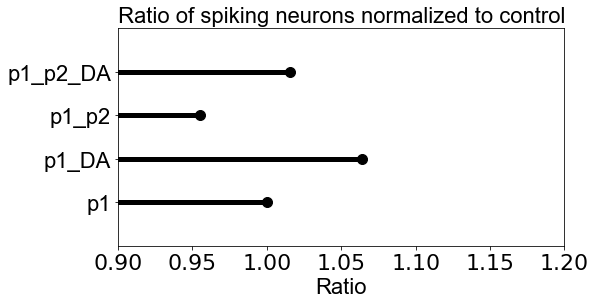

In [16]:
plot_ratio_normalized_spiking(ratio_dict=n_dspn, experiment_names=e, fig_name=neuron_type, folder=folder, save=True, min_ratio=0.9, max_ratio=1.2)

In [17]:
%%time
neuron_type = "iSPN"
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
spiking_analysis_dict_ispn = spiking_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_dopamine_modulation_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_p2.hdf5
Loading 40000 neurons with 35040256 synaps

In [20]:
p_ispn = calculate_ratio(dictionary=spiking_analysis_dict_ispn)
n_ispn = normalized_prp(dictionary=p_ispn, normalized="p1")

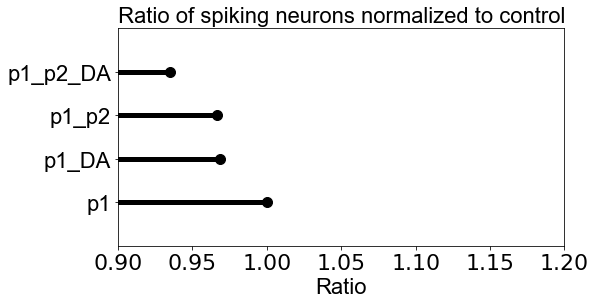

In [23]:
plot_ratio_normalized_spiking(ratio_dict=n_ispn, experiment_names=e, fig_name=neuron_type, folder=folder, save=True,min_ratio=0.9, max_ratio=1.2)

In [24]:
len(specific_trace_ids['p1'])

1936

In [25]:
len(spiking_analysis_dict_ispn['p1']['spiking'])

1835

In [26]:
len(specific_trace_ids['p1_p2'])

1936

In [27]:
len(spiking_analysis_dict_ispn['p1_p2']['spiking'])

1774

In [28]:
import numpy as np
diff = np.setdiff1d(spiking_analysis_dict_ispn['p1']['spiking'],spiking_analysis_dict_ispn['p1_p2']['spiking'])

In [29]:
len(diff)

70

In [30]:
diff

array([ 2200,  2685,  2687,  2732,  3457,  4266,  4773,  5855,  6333,
        6873,  7661,  8378,  8383,  8441,  8497, 10288, 10553, 10637,
       11112, 11292, 11387, 11459, 11605, 11608, 11701, 11761, 12140,
       13192, 13193, 13197, 13724, 13728, 13797, 14090, 14228, 14415,
       14955, 14956, 15467, 15575, 15944, 18615, 18620, 18728, 18733,
       18994, 18996, 18997, 19062, 20660, 20767, 21808, 23800, 23866,
       23927, 24742, 24801, 27322, 27443, 27752, 28733, 29212, 30779,
       31896, 34050, 34161, 34265, 34269, 35045, 35491])